In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('car-msrp.csv')

In [3]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
dff = df.copy()

In [5]:
dff.columns = df.columns.str.lower().str.replace(' ', "_")


In [6]:
for c in dff.dtypes[dff.dtypes == 'object'].index:
    dff[c] = dff[c].str.lower().str.replace(' ', "_")

In [7]:
features = ['make', 'model', 'year', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'msrp' ]

In [8]:
dff

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


In [9]:
dff[features].isnull().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [10]:
dff[features] = dff[features].fillna(0)

In [11]:
dff[features].isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

In [12]:
dff['price'] = dff.msrp

In [13]:
del dff['msrp']

In [14]:
features = ['make', 'model', 'year', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'price' ]

In [15]:
dff[features]

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,46135
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19,40650
2,bmw,1_series,2011,300.0,6.0,manual,coupe,28,20,36350
3,bmw,1_series,2011,230.0,6.0,manual,coupe,28,18,29450
4,bmw,1_series,2011,230.0,6.0,manual,convertible,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,300.0,6.0,automatic,4dr_hatchback,23,16,46120
11910,acura,zdx,2012,300.0,6.0,automatic,4dr_hatchback,23,16,56670
11911,acura,zdx,2012,300.0,6.0,automatic,4dr_hatchback,23,16,50620
11912,acura,zdx,2013,300.0,6.0,automatic,4dr_hatchback,23,16,50920


# Answer 1

In [16]:
dff['transmission_type'].value_counts()
# Automatic transmission has the highest occourance = 8266

automatic           8266
manual              2935
automated_manual     626
direct_drive          68
unknown               19
Name: transmission_type, dtype: int64

In [17]:
dff['transmission_type'].mode()

0    automatic
Name: transmission_type, dtype: object

# Answer 2

In [18]:
numerical = list(dff[features].dtypes[dff[features].dtypes != 'object'].index)

In [19]:
dff[numerical].corr()
# highway_mpg and city_mpg has the highest mutual correlation score = 0.886829

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg,price
year,1.000000,0.338714,-0.040708,0.258240,0.198171,0.227590
engine_hp,0.338714,1.000000,0.774851,-0.415707,-0.424918,0.650095
engine_cylinders,-0.040708,0.774851,1.000000,-0.614541,-0.587306,0.526274
highway_mpg,0.258240,-0.415707,-0.614541,1.000000,0.886829,-0.160043
city_mpg,0.198171,-0.424918,-0.587306,0.886829,1.000000,-0.157676
price,0.227590,0.650095,0.526274,-0.160043,-0.157676,1.000000


## Making price binary

In [20]:
avg = dff['price'].mean()


In [21]:
dff['price'].isnull().sum()

0

In [22]:
dff['above_average'] = (dff['price'] > avg).astype(int)

In [23]:
features.append('above_average')

In [24]:
features

['make',
 'model',
 'year',
 'engine_hp',
 'engine_cylinders',
 'transmission_type',
 'vehicle_style',
 'highway_mpg',
 'city_mpg',
 'price',
 'above_average']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
dff_train , df_test = train_test_split(dff[features], test_size = 0.2, random_state = 42)

In [27]:
df_train, df_val = train_test_split(dff_train, test_size = 0.25, random_state = 42)

In [28]:
print(len(df_train), len(df_test), len(df_val))

7148 2383 2383


In [29]:
y_train = df_train['above_average']
y_test = df_test['above_average']
y_val = df_val['above_average']

In [30]:
del df_train['above_average']
del df_test['above_average']
del df_val['above_average']

In [31]:
features.remove('above_average')

In [32]:
features

['make',
 'model',
 'year',
 'engine_hp',
 'engine_cylinders',
 'transmission_type',
 'vehicle_style',
 'highway_mpg',
 'city_mpg',
 'price']

# Answer 3


In [33]:
from sklearn.metrics import mutual_info_score

In [34]:
categorical = list(df_train[features].dtypes[df_train.dtypes == 'object'].index)

In [35]:
df_train[categorical].isnull().sum()

make                 0
model                0
transmission_type    0
vehicle_style        0
dtype: int64

In [36]:
def mi_score(series):
    return mutual_info_score(y_train, series)

In [37]:
mi = df_train[categorical].apply(mi_score)

In [38]:
mi = round(mi, 2)

In [39]:
mi.sort_values(ascending = False)
# the lowest mutual information score is transmission_type = 0.02

model                0.46
make                 0.24
vehicle_style        0.08
transmission_type    0.02
dtype: float64

# Answer 4

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer

In [41]:
dict_train = df_train.to_dict(orient = 'records')

In [42]:
dv = DictVectorizer(sparse = False)

In [43]:
X_train = dv.fit_transform(dict_train)

In [44]:
dict_test = df_train.to_dict(orient = 'records')
dict_val = df_val.to_dict(orient = 'records')

In [45]:
X_test = dv.transform(dict_test)
X_val = dv.transform(dict_val)

In [46]:
model = LogisticRegression(solver = 'liblinear', C = 10, max_iter = 1000, random_state =42)

In [47]:
model.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [48]:
y_pred = model.predict(X_val)


In [69]:
y_predb = model.predict_proba(X_val)[:,1]

In [70]:
y_predb

array([6.87097467e-48, 1.00000000e+00, 5.01382436e-81, ...,
       1.97278902e-73, 1.00000000e+00, 1.00000000e+00])

In [78]:
((y_predb >= 0.5) == y_val).mean()

0.9995803608896349

In [80]:
y_predbb = (y_pred>= 0.5).astype(int)

array([0, 1, 0, ..., 0, 1, 1])

In [49]:
(y_pred == y_val).mean().round(2)

1.0

In [74]:
len(y_predb)

2383

In [50]:
df_train

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
3972,mitsubishi,endeavor,2011,225.0,6.0,automatic,4dr_suv,19,15,33599
1997,kia,borrego,2009,276.0,6.0,automatic,4dr_suv,21,17,26245
5216,lamborghini,gallardo,2012,570.0,10.0,manual,convertible,20,12,248000
2805,chevrolet,colorado,2016,200.0,4.0,automatic,crew_cab_pickup,27,20,24990
11369,pontiac,vibe,2009,158.0,4.0,automatic,4dr_hatchback,26,20,20475
...,...,...,...,...,...,...,...,...,...,...
9232,toyota,sienna,2016,266.0,6.0,automatic,passenger_minivan,25,18,37655
5710,chevrolet,hhr,2009,260.0,4.0,manual,wagon,29,21,25135
11306,hyundai,veracruz,2012,260.0,6.0,automatic,4dr_suv,22,17,28345
4414,mitsubishi,expo,1993,136.0,4.0,manual,2dr_hatchback,26,19,2000


In [82]:
from sklearn.metrics import roc_curve

In [87]:
fpr, tpr, threshold = roc_curve(y_val, y_predbb)

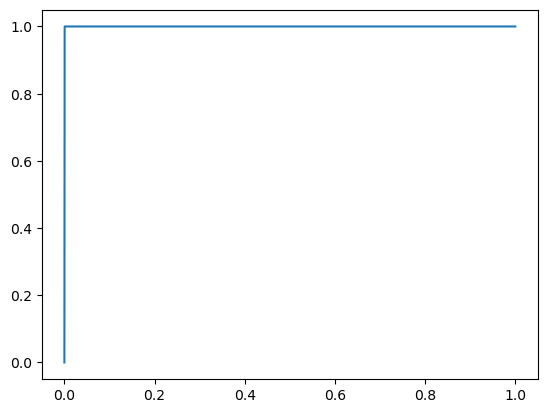

In [90]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)

In [91]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val, y_predbb)

0.9997096399535425

In [92]:
roc_auc_score(y_val,y_pred)

0.9997096399535425